In [2]:
# make plots
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import pickle
import numpy as np
from math import sqrt
from decimal import Decimal

In [3]:
reg_norms = np.linspace(-6, -4.5, num=5)
reg_norms = 10 ** (reg_norms + 4)
regs = np.linspace(-7, -3, num=5)
#reg_sgd = regs[0:4]
reg_sgd = regs
regs = 10 ** regs
reg_sgd = 10 ** reg_sgd
#plt_types = ['Training loss (cross-entropy)', 'Test error (%)']
plt_types = ['Training loss (cross-entropy)', 'Test error (%)', 'Test loss (cross-entropy)']
fac = 1e-4
epochs = 1800

In [4]:
reg_norms

array([0.01      , 0.02371374, 0.05623413, 0.13335214, 0.31622777])

In [8]:
def extractTestAccu_AdamW(epochs, amsgrad, reg_norms, fac = 1e-3):
    method = 'AdamW'
    #reg_norms = np.linspace(-6, -4.5, num=5)
    #reg_norms = 10 ** (reg_norms + 4)
    tot_train_size = 50000
    batch_size = 128
# reg = reg_norm * \sqrt{b / B T}
    bestTestAcc = np.zeros(reg_norms.shape[0])
    xlab = np.zeros(reg_norms.shape[0])
    i = 0
    for reg_norm in reg_norms:
        reg = reg_norm * sqrt(batch_size / epochs / tot_train_size)
        #print("reg = {}".format(reg))
        name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg_norm * 1e7), amsgrad,epochs)
        file = open("{0}.p".format(name), "rb" )
        acc,loss = pickle.load(file)
        file.close()
        bestTestAcc[i] = np.max(acc,0)[1]
        xlab[i] = reg_norm * sqrt(batch_size / epochs / tot_train_size)
        #xlab[i] = reg_norm * fac
        i = i + 1
    return bestTestAcc, xlab


In [9]:
def extractTestAccu_Adam(epochs, amsgrad, regs,method = 'Adam'):
    assert(method == 'Adam' or method == 'SGD')
    #regs = np.linspace(-7, -3, num=5)
    #regs = 10 ** regs
    batch_size = 128
    i = 0
    bestTestAcc = np.zeros(regs.shape[0])
    xlab = np.zeros(regs.shape[0])
    for reg in regs:
       # print("reg = {}".format(reg))
        name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg * 1e7), amsgrad, epochs)
        open_file = open("{0}.p".format(name), "rb" )
        acc, loss = pickle.load(open_file)
        open_file.close()
        bestTestAcc[i] = np.max(acc,0)[1]
        xlab[i] = reg
        i = i + 1
    return bestTestAcc, xlab

In [6]:
def plotLossvsEpochs(epochs, amsgrad, regs, reg_norms, plt_type):
    #plt.figure() # In this example, all the plots will be in one figure.  
    method = 'Adam'
    #regs = np.linspace(-7, -3, num=5)
    #regs = 10 ** regs
    plt_types = ['Training loss (cross-entropy)', 'Test error (%)']
    for reg in regs:
        #print("reg = {}".format(reg))
        name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg * 1e7), amsgrad, epochs)
        open_file = open("{0}.p".format(name), "rb" )
        acc, loss = pickle.load(open_file)
        open_file.close()
        if plt_type == plt_types[0]:
            plt.plot(range(loss.shape[0]),loss[:,0], label = method, color = 'red')
        elif plt_type == plt_types[1]:
            plt.plot(range(acc.shape[0]),(1 - acc[:,1]) * 100, label = method, color = 'red')
        else:
            print("Please specify a plot type of following kind:{}".format(plt.types))
            exit(1)
    method = 'AdamW'
    #reg_norms = np.linspace(-6, -4.5, num=5)
    #reg_norms = 10 ** (reg_norms + 4)
    tot_train_size = 50000
    batch_size = 128
    for reg_norm in reg_norms:
        reg = reg_norm * sqrt(batch_size / epochs / tot_train_size)
        #print("reg = {}".format(reg))
        name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg_norm * 1e7), amsgrad,epochs)
        file = open("{0}.p".format(name), "rb" )
        acc,loss = pickle.load(file)
        file.close()
        if plt_type == plt_types[0]:
            plt.plot(range(loss.shape[0]),loss[:,0], label = method, color = 'blue')
        elif plt_type == plt_types[1]:
            plt.plot(range(acc.shape[0]),(1 - acc[:,1]) * 100, label = method, color = 'blue')
        else:
            print("Please specify a plot type of following kind:{}".format(plt.types))
            exit(1)
    plt.xlabel("Epochs")
    plt.ylabel(plt_type)
    plt.title('Adam and AdamW with different weight decays')
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')
    plt.show()
    

In [7]:
def plotTestvsTrain(epochs, amsgrad, regs, reg_norms):
    #plt.figure() # In this example, all the plots will be in one figure.  
    method = 'Adam'
    #regs = np.linspace(-7, -3, num=5)
    #regs = 10 ** regs
    #plt_types = ['Training loss (cross-entropy)', 'Test error (%)']
    for reg in regs:
        #print("reg = {}".format(reg))
        name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg * 1e7), amsgrad, epochs)
        open_file = open("{0}.p".format(name), "rb" )
        acc, loss = pickle.load(open_file)
        open_file.close()
        idx = loss[:,0] < 1
        plt.plot(loss[idx,0], (1 - acc[idx,1]) * 100, 'Dr',label = method)
    method = 'AdamW'
    #reg_norms = np.linspace(-6, -4.5, num=5)
    #reg_norms = 10 ** (reg_norms + 4)
    tot_train_size = 50000
    batch_size = 128
    for reg_norm in reg_norms:
        reg = reg_norm * sqrt(batch_size / epochs / tot_train_size)
        #print("reg = {}".format(reg))
        name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg_norm * 1e7), amsgrad,epochs)
        file = open("{0}.p".format(name), "rb" )
        acc,loss = pickle.load(file)
        file.close()
        idx = loss[:,0] < 1
        plt.plot(loss[idx,0], (1 - acc[idx,1]) * 100, 'ob',label = method)
    plt.xlabel("Epochs")
    plt.ylabel('Test error (%)')
    plt.xlabel('Training loss (cross entropy)')
    plt.title('Adam and AdamW with different weight decays')
    plt.xscale('log')
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')
    plt.show()

In [59]:
def plotLossvsEpochs2(epochs, regs, reg_sgd, reg_norms, plt_type, ams, end, begin = 0):
    #plt.figure() # In this example, all the plots will be in one figure.  
    #regs = np.linspace(-7, -3, num=5)
    #regs = 10 ** regs
    plt_types = ['Training loss (cross-entropy)', 'Test error (%)','Test loss (cross-entropy)']
    #ams = [False, True]
    #markers = ['X','D','o','v',',']
    markers  = markers2 =  [] * 5
    # SGD
    method = 'SGD'
    idx = 0
    for reg in reg_sgd:
        for amsgrad in [False]:
            name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg * 1e7), amsgrad, epochs)
            open_file = open("{0}.p".format(name), "rb" )
            acc, loss = pickle.load(open_file)
            open_file.close()
            label, symbol = createLabel(method, amsgrad)
            if plt_type == plt_types[0]:
                plt.plot(range(begin, end),loss[begin:end,0], symbol , label = label,alpha=1)
            elif plt_type == plt_types[1]:
                plt.plot(range(begin, end),(1 - acc[begin:end,1]) * 100, symbol , label = label,alpha=1)
            elif plt_type == plt_types[2]:
                plt.plot(range(begin, end),loss[begin:end,1], symbol  , label = label,alpha=1)
            else:
                print("Please specify a plot type of following kind:{}".format(plt.types))
                exit(1)
        idx = idx + 1
    idx = 0
    method = 'Adam'
    alp = 0.7
    for reg in regs:
        for amsgrad in ams:
            name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg * 1e7), amsgrad, epochs)
            open_file = open("{0}.p".format(name), "rb" )
            acc, loss = pickle.load(open_file)
            open_file.close()
            label, symbol = createLabel(method, amsgrad)
            if plt_type == plt_types[0]:
                plt.plot(range(begin, end),loss[begin:end,0], symbol, label = label,alpha=alp)
            elif plt_type == plt_types[1]:
                plt.plot(range(begin, end),(1 - acc[begin:end,1]) * 100, symbol , label = label,alpha=alp)
            elif plt_type == plt_types[2]:
                plt.plot(range(begin, end),loss[begin:end,1], symbol, label = label,alpha=alp)
            else:
                print("Please specify a plot type of following kind:{}".format(plt.types))
                exit(1)
        idx = idx + 1
    method = 'AdamW'
    #reg_norms = np.linspace(-6, -4.5, num=5)
    #reg_norms = 10 ** (reg_norms + 4)
    tot_train_size = 50000
    batch_size = 128
    idx = 0
    alp = 0.4
    #markers2 = ['X','D','o','v',',']
    for reg_norm in reg_norms:
        for amsgrad in ams:
            reg = reg_norm * sqrt(batch_size / epochs / tot_train_size)
        #print("reg = {}".format(reg))
            name = "summary_stats/net_{0}_{1}_amsgrad_{2}_epoch_{3}".format(method, int(reg_norm * 1e7), amsgrad,epochs)
            file = open("{0}.p".format(name), "rb" )
            acc,loss = pickle.load(file)
            file.close()
            label, symbol = createLabel(method, amsgrad)
            if plt_type == plt_types[0]: # training loss
                plt.plot(range(begin, end),loss[begin:end,0], symbol , label = label,alpha=alp)
            elif plt_type == plt_types[1]: # test error
                plt.plot(range(begin, end),(1 - acc[begin:end,1]) * 100, symbol , label = label,alpha=alp)
            elif plt_type == plt_types[2]: # test loss
                plt.plot(range(begin, end),loss[begin:end,1], symbol , label = label,alpha=alp)
            else:
                print("Please specify a plot type of following kind:{}".format(plt.types))
                exit(1)
        idx = idx + 1
    
    plt.xlabel("Epochs")
    plt.ylabel(plt_type)
    if len(reg_sgd) == 0:
        plt.title('Adam and AdamW with different weight decays')
    else:
        plt.title('Adam, AdamW and SGD with momentum with different weight decays')
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')
    plt.show()

In [11]:
def createLabel(method, amsgrad):
    if amsgrad:
        label = "{0} + AMSGrad".format(method)
        if method == 'Adam':
            symbol = ':g'
        elif method == 'AdamW':
            symbol = ':c'
        else:
            symbol = ':m'
    else:
        label = "{0}".format(method)
        if method == 'Adam':
            symbol = '--r'
        elif method == 'AdamW':
            symbol = '--b'
        else:
            symbol = '--y'
    return label, symbol

In [17]:
def plotTestErrorVSweightdecay(regs, reg_sgd, reg_norms, fac, epochs):
    plt.figure() # In this example, all the plots will be in one figure. 
    colours=['-ro','--bo','-gD','--cD',':m|']
    #fac = 1e-4
#for i in range(len(acc)):
    ams = [False, True]
    i = 0
    for amsgrad in ams:
        acc, xlab = extractTestAccu_Adam(epochs, amsgrad, regs)
        acc2, xlab2 = extractTestAccu_AdamW(epochs, amsgrad, reg_norms, fac)
        plt.plot(xlab,(1 - acc) * 100,colours[i], label = createLabel("Adam", amsgrad)[0])
        plt.plot(xlab2,(1 - acc2) * 100,colours[i + 1], label = createLabel('AdamW', amsgrad)[0])
        i = i + 2
    acc, xlab = extractTestAccu_Adam(epochs, False, reg_sgd, 'SGD')
    plt.plot(xlab,(1 - acc) * 100,colours[i], label = createLabel("SGD", False)[0])
    
      #  acc, xlab = extractTestAccu_AdamW(300, False, reg_norms, fac)
       # plt.plot(xlab,(1 - acc) * 100,colours[1], label = 'AdamW')
#acc, xlab = extractTestAccu_Adam(300, True, regs)
#plt.plot(xlab,(1 - acc) * 100,colours[2], label = 'AMSGrad')
#acc, xlab = extractTestAccu_AdamW(300, True, reg_norms,fac)
#plt.plot(xlab,(1 - acc) * 100,colours[3], label = 'AdamW + AMSGrad')
    plt.ylabel(plt_types[1])
    plt.xlabel('parameter $\lambda$ in the algorithm'.format('%.0e' %Decimal(fac)))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xscale('log')
    plt.title("(Best) test error vs weight decay")
    plt.legend()
    plt.savefig('figures/testerror_weightdecay.pdf')
    plt.show()

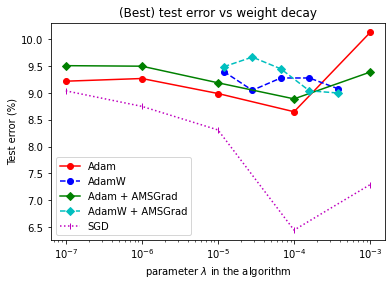

In [19]:
plotTestErrorVSweightdecay(regs, reg_sgd,reg_norms, fac, epochs)
# adam + amsgrad - overfit the training set
# more variance in Adam
# amdsgrad helps both Adam and AdamW
# in my simulation, Adam


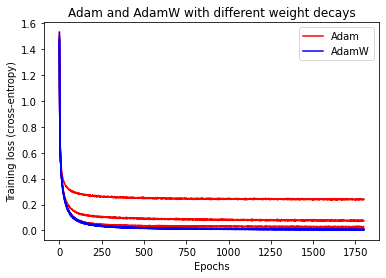

In [88]:
plotLossvsEpochs(epochs, False, regs, reg_norms, plt_types[0])

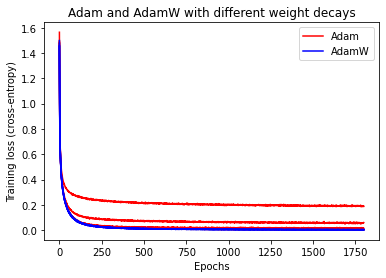

In [12]:
plotLossvsEpochs(epochs, True, regs, reg_norms, plt_types[0])

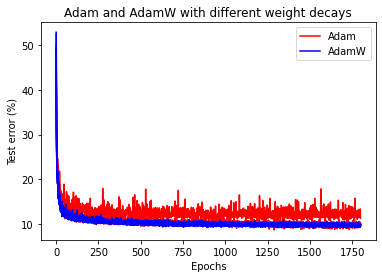

In [13]:
plotLossvsEpochs(epochs, False, regs, reg_norms, plt_types[1])

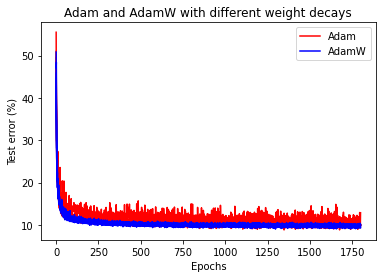

In [14]:
plotLossvsEpochs(epochs, True, regs, reg_norms, plt_types[1])

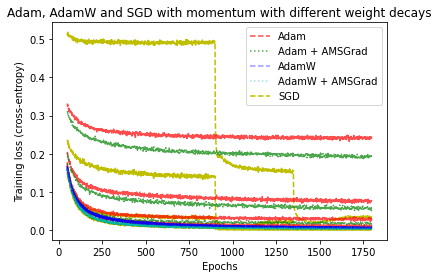

In [83]:
plotLossvsEpochs2(epochs, regs, reg_sgd, reg_norms, plt_types[0], ams = [False,True],end = 1800, begin = 50)

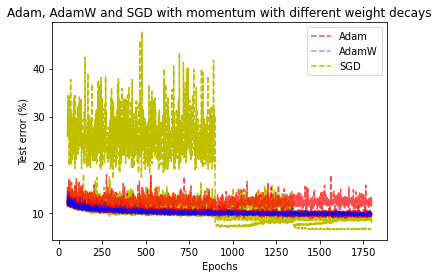

In [84]:
plotLossvsEpochs2(epochs, regs, reg_sgd, reg_norms, plt_types[1], ams = [False],end = 1800, begin = 50)
#p.savefig("figures/testerror_sgd.pdf")

In [ ]:
plotLossvsEpochs2(epochs, regs, [], reg_norms, plt_types[1], ams = [False],end = 1800, begin = 50)
#p.savefig("figures/testerror_sgd.pdf")

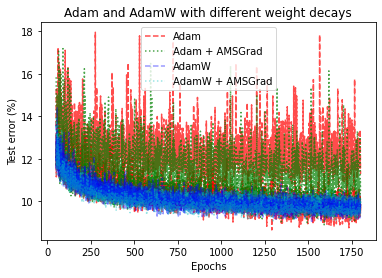

In [85]:
plotLossvsEpochs2(epochs, regs, [], reg_norms, plt_types[1], ams = [False, True],end = 1800, begin = 50)

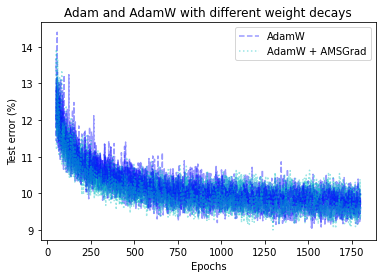

In [78]:
plotLossvsEpochs2(epochs, [], [], reg_norms, plt_types[1], ams = [False, True],end = 1800, begin = 50)

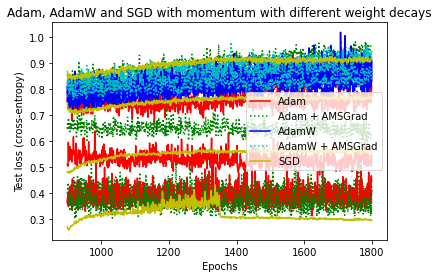

In [80]:
plotLossvsEpochs2(epochs, regs, reg_sgd, reg_norms, plt_types[2], end = 1800, begin = 900)

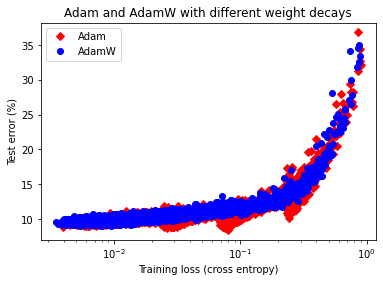

In [48]:
plotTestvsTrain(epochs, False, regs, reg_norms)

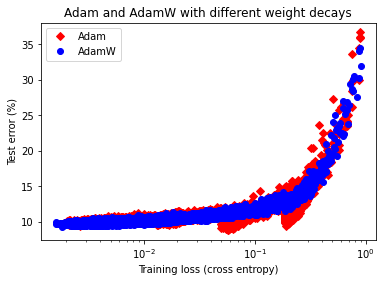

In [49]:
plotTestvsTrain(epochs, True, regs, reg_norms)